<a href="https://colab.research.google.com/github/kopmean/Teach-Basic-Ai/blob/main/teach_seagate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref:https://adamharley.com/nn_vis/cnn/2d.html

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

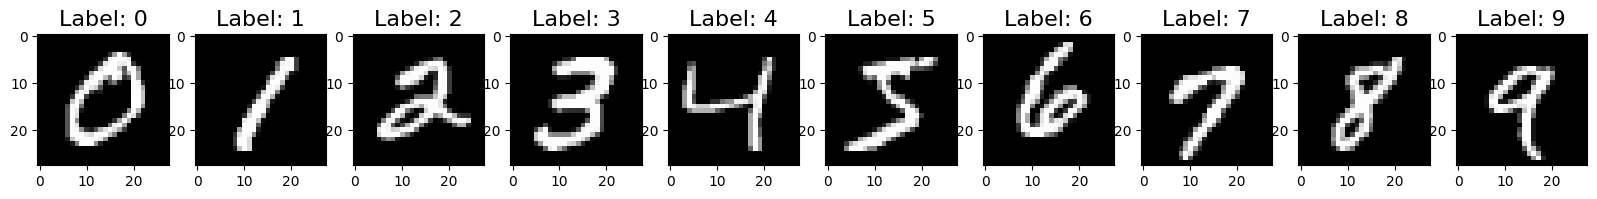

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Label: {i}", fontsize=16)

In [5]:
# one_hot_encoding
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [5]:
y_train[0]

5

# Prepare Data

In [7]:
# Normalize Data 0-1
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# Reshape Data matrix to vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [10]:
model = Sequential()
model.add(Dense(units=300, input_shape=(784,), activation='linear'))
model.add(Dense(units=100, activation='linear'))
# model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


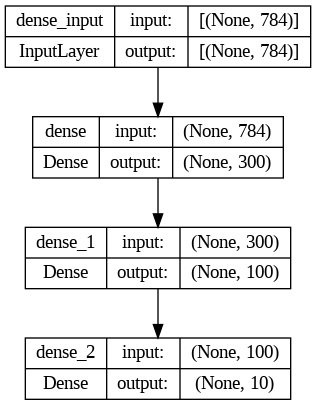

In [11]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

# Train

In [12]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 5s 33ms/step - loss: 0.4597 - accuracy: 0.8644
Epoch 2/10
118/118 [==============================] - 4s 37ms/step - loss: 0.2936 - accuracy: 0.9171
Epoch 3/10
118/118 [==============================] - 5s 43ms/step - loss: 0.2806 - accuracy: 0.9218
Epoch 4/10
118/118 [==============================] - 5s 41ms/step - loss: 0.2754 - accuracy: 0.9237
Epoch 5/10
118/118 [==============================] - 6s 54ms/step - loss: 0.2705 - accuracy: 0.9250
Epoch 6/10
118/118 [==============================] - 5s 44ms/step - loss: 0.2638 - accuracy: 0.9265
Epoch 7/10
118/118 [==============================] - 5s 39ms/step - loss: 0.2599 - accuracy: 0.9283
Epoch 8/10
118/118 [==============================] - 5s 43ms/step - loss: 0.2600 - accuracy: 0.9272
Epoch 9/10
118/118 [==============================] - 2s 20ms/step - loss: 0.2587 - accuracy: 0.9276
Epoch 10/10
118/118 [==============================] - 2s 17ms/step - loss: 0.2585 - accura

# Evaluate

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9237
Test Loss: 0.27818793058395386, Test Accuracy: 0.9236999750137329


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 3ms/step
[[5.0371214e-06 4.3275455e-13 9.1543807e-06 ... 9.7924829e-01
  2.5161025e-05 5.8686739e-04]
 [1.1384446e-04 1.4865798e-06 9.8586679e-01 ... 3.1320186e-20
  5.4378204e-05 9.5223084e-16]
 [2.7793129e-07 9.9328685e-01 3.6760957e-03 ... 5.0475314e-04
  1.0351657e-03 6.5787244e-05]
 ...
 [2.4704156e-09 2.1061217e-09 5.5177761e-06 ... 2.2851089e-04
  1.2417082e-02 2.0160295e-02]
 [4.3116149e-08 1.0019931e-07 6.6368571e-08 ... 1.5917280e-08
  2.0830434e-02 1.4704781e-07]
 [1.2941427e-07 2.5347757e-14 4.0851868e-05 ... 1.7700591e-13
  1.7030752e-08 1.5229193e-11]]
[7 2 1 ... 4 5 6]


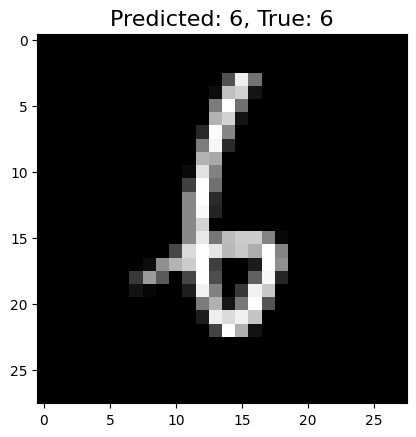

In [15]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sampel_pred_class = y_pred_classes[random_idx]

plt.title(f"Predicted: {y_sampel_pred_class}, True: {y_sample_true}", fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')
plt.show()

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

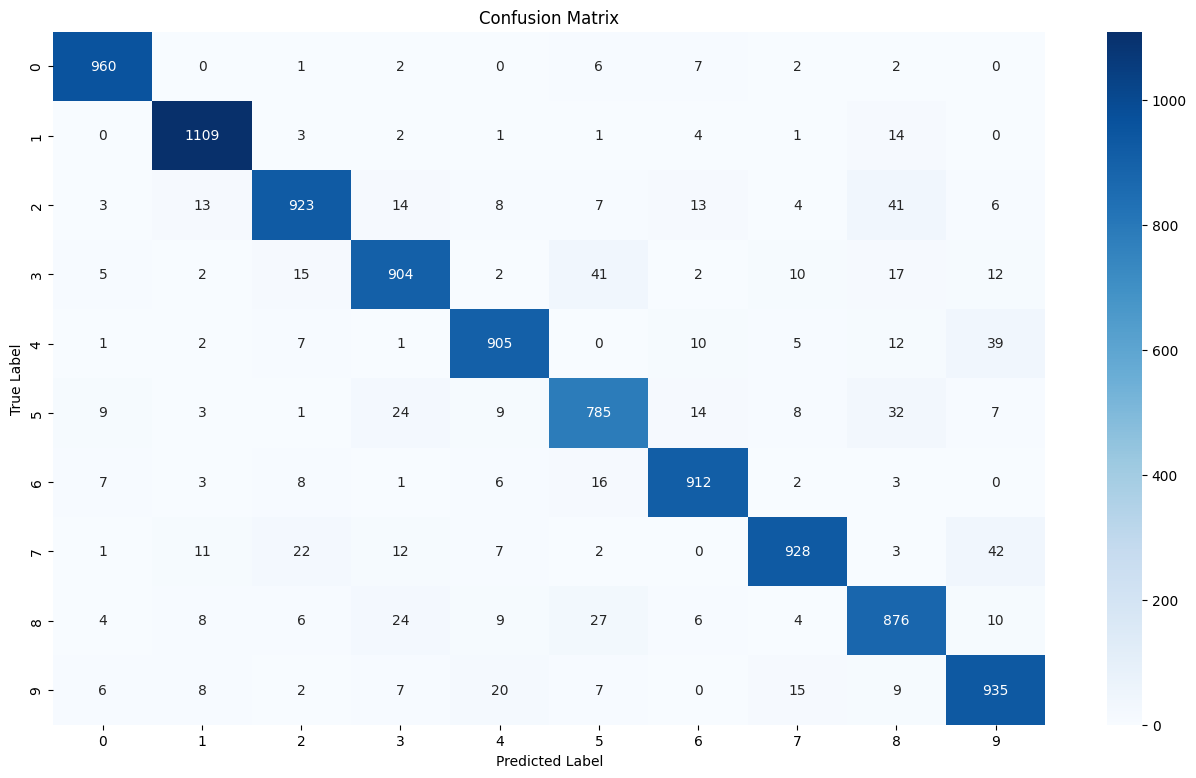

In [16]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Investigate Some Errors

In [17]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [18]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #last ones

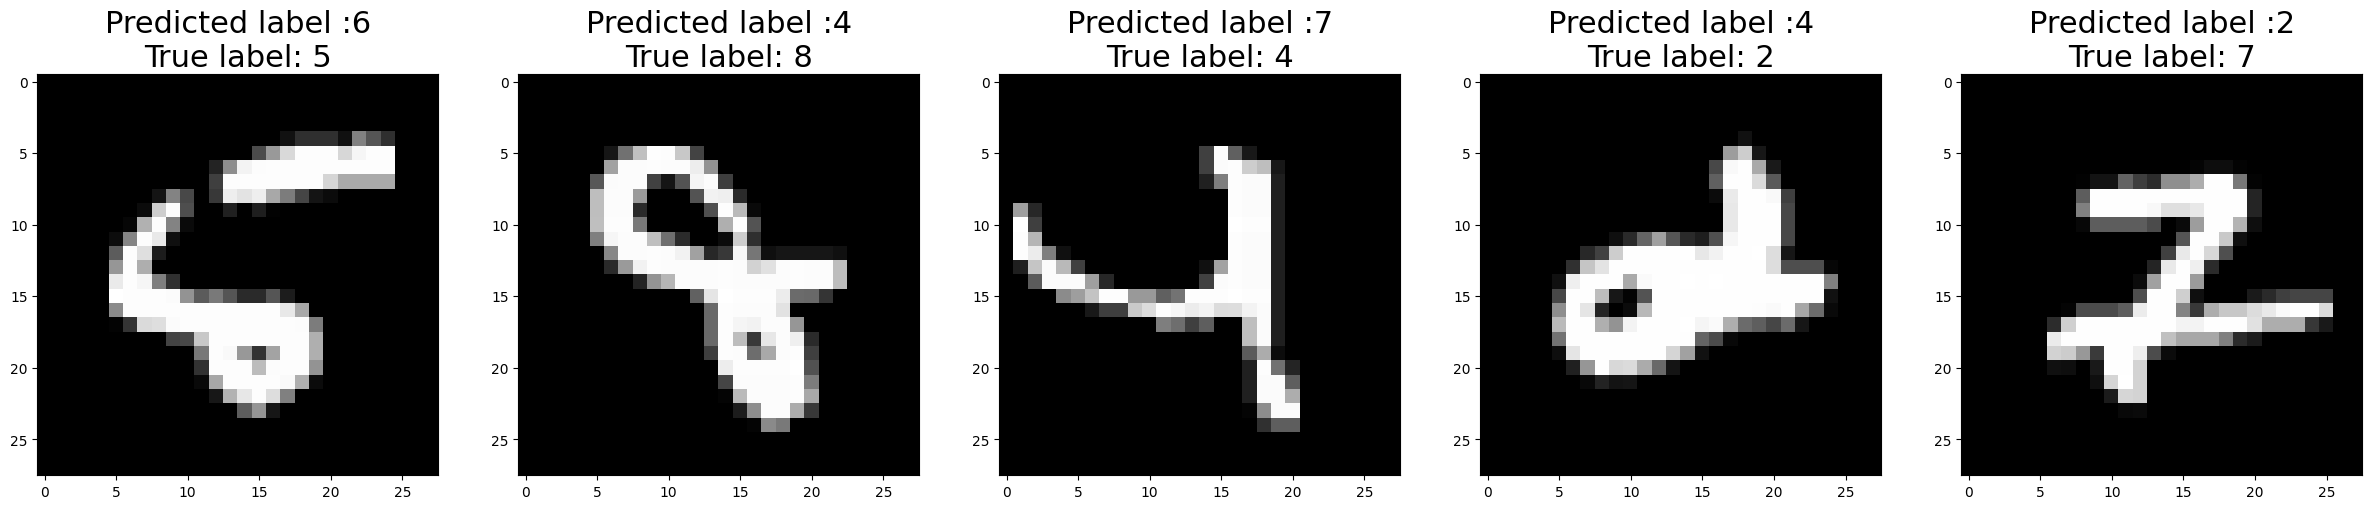

In [19]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30, 30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Predicted label :{y_p}\nTrue label: {y_t}", fontsize=22)
